# The Kolmogorov-Smirnov statistics

In this example, we illustrate how the Kolmogorov-Smirnov statistics is computed. 
* We generate a sample from a gaussian distribution. 
* We create a Uniform distribution which parameters are estimated from the sample.
* The Kolmogorov-Smirnov statistics is computed and plot on the empirical cumulated distribution function.

In [1]:
import openturns as ot

The computeKSStatisticsIndex function computes the Kolmogorov-Smirnov distance between the sample and the distribution. Furthermore, it returns the index which achieves the maximum distance in the sorted sample. The following function is for teaching purposes only: use `FittingTest` for real applications.

In [2]:
def computeKSStatisticsIndex(sample,distribution):
    sample = ot.Sample(sample.sort())
    n = sample.getSize()
    D = 0.
    index = -1
    D_previous = 0.
    for i in range(n):
        F = distribution.computeCDF(sample[i])
        D = max(F - float(i)/n,float(i+1)/n - F,D)
        if (D > D_previous):
            index = i
            D_previous = D
    return D, index

The drawKSDistance function plots the empirical distribution function of the sample and the Kolmogorov-Smirnov distance at point x. 

In [3]:
def drawKSDistance(sample,distribution,x,D,distFactory):
    graph = ot.Graph("KS Distance = %.4f" % (D),"X","CDF",True,"topleft")
    # Vertical line at point x
    ECDF_index = sample.computeEmpiricalCDF([x])
    CDF_index = distribution.computeCDF(x)
    curve = ot.Curve([x,x],[ECDF_index,CDF_index])
    curve.setColor("green")
    curve.setLegend("KS Statistics")
    curve.setLineWidth(4.*curve.getLineWidth())
    graph.add(curve)
    # Empirical CDF
    empiricalCDF = ot.UserDefined(sample).drawCDF()
    empiricalCDF.setColors(["blue"])
    empiricalCDF.setLegends(["Empirical DF"])
    graph.add(empiricalCDF)
    #
    distname = distFactory.getClassName()
    distribution = distFactory.build(sample)
    cdf = distribution.drawCDF()
    cdf.setLegends([distname])
    graph.add(cdf)
    return graph

We generate a sample from a standard gaussian distribution.

In [4]:
N = ot.Normal()
n = 10
sample = N.getSample(n)

Compute the index which achieves the maximum Kolmogorov-Smirnov distance.

We then create a Uniform distribution which parameters are estimated from the sample. This way, the K.S. distance is large enough to being graphically significant.

In [5]:
distFactory = ot.UniformFactory()
distribution = distFactory.build(sample)
distribution

class=Uniform name=Uniform dimension=1 a=-2.48294 b=1.7388

Compute the index which achieves the maximum Kolmogorov-Smirnov distance.

In [6]:
D, index = computeKSStatisticsIndex(sample,distribution)
print("D=",D,", Index=",index)

D= 0.28431981766196146 , Index= 2


Get the value which maximizes the distance.

In [7]:
x = sample[index,0]
x

-0.43826561996041397

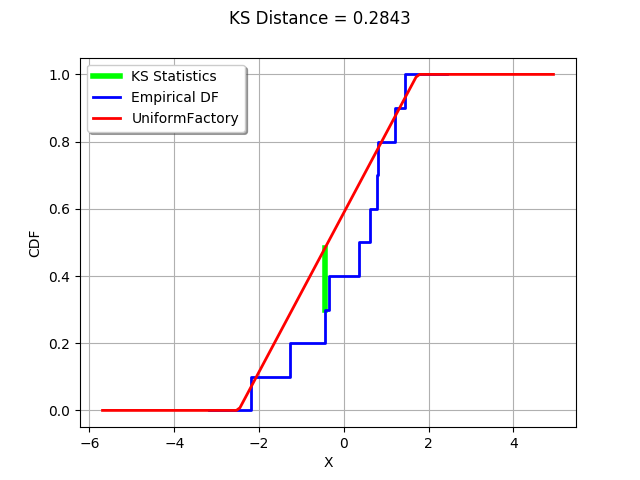

In [8]:
drawKSDistance(sample,distribution,x,D,distFactory)

We see that the K.S. statistics is acheived where the distance between the empirical distribution function of the sample and the candidate distribution is largest.